In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("../resources/olympics1992_2008.zip", skiprows = 4)

In [5]:
df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Barcelona,1992,Aquatics,Diving,"XIONG, Ni",CHN,Men,10m platform,M,Bronze
1,Barcelona,1992,Aquatics,Diving,"SUN, Shuwei",CHN,Men,10m platform,M,Gold
2,Barcelona,1992,Aquatics,Diving,"DONIE, Scott R.",USA,Men,10m platform,M,Silver
3,Barcelona,1992,Aquatics,Diving,"CLARK, Mary Ellen",USA,Women,10m platform,W,Bronze
4,Barcelona,1992,Aquatics,Diving,"FU, Mingxia",CHN,Women,10m platform,W,Gold


In [6]:
df.isna().describe()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
count,9619,9619,9619,9619,9619,9619,9619,9619,9619,9619
unique,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False
freq,9619,9619,9619,9619,9619,9619,9619,9619,9619,9619


## Which country is the most efficient, averaging the highest overall medal count across all disciplines?

In [7]:
country_df = df.groupby(["NOC", "Edition"]) #group by year and National Olympic Committee

In [8]:
country_count = country_df.count() #count medal totals
country_count.head() #view

City  Sport  Discipline  Athlete  Gender  Event  Event_gender  \
NOC Edition                                                                  
AFG 2008        1      1           1        1       1      1             1   
ALG 1992        2      2           2        2       2      2             2   
    1996        3      3           3        3       3      3             3   
    2000        5      5           5        5       5      5             5   
    2008        2      2           2        2       2      2             2   

             Medal  
NOC Edition         
AFG 2008         1  
ALG 1992         2  
    1996         3  
    2000         5  
    2008         2

In [9]:
country_count = country_count.reset_index() #reset groups
country_count #view

,NOC,Edition,City,Sport,Discipline,Athlete,Gender,Event,Event_gender,Medal
0,AFG,2008,1,1,1,1,1,1,1,1
1,ALG,1992,2,2,2,2,2,2,2,2
2,ALG,1996,3,3,3,3,3,3,3,3
3,ALG,2000,5,5,5,5,5,5,5,5
4,ALG,2008,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
378,YUG,1996,26,26,26,26,26,26,26,26
379,YUG,2000,26,26,26,26,26,26,26,26
380,ZAM,1996,1,1,1,1,1,1,1,1
381,ZIM,2004,3,3,3,3,3,3,3,3


In [10]:
country_avg = country_count.groupby(["NOC"]) #group by NOC again
country_avg.head() #view

,NOC,Edition,City,Sport,Discipline,Athlete,Gender,Event,Event_gender,Medal
0,AFG,2008,1,1,1,1,1,1,1,1
1,ALG,1992,2,2,2,2,2,2,2,2
2,ALG,1996,3,3,3,3,3,3,3,3
3,ALG,2000,5,5,5,5,5,5,5,5
4,ALG,2008,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
378,YUG,1996,26,26,26,26,26,26,26,26
379,YUG,2000,26,26,26,26,26,26,26,26
380,ZAM,1996,1,1,1,1,1,1,1,1
381,ZIM,2004,3,3,3,3,3,3,3,3


In [11]:
medal_avg = country_avg.mean() #avg of values by NOC
medal_sorted = medal_avg.sort_values(by = "Medal", ascending = False) #sort by medal avg desc
medal_sorted.head() #view

,Edition,City,Sport,Discipline,Athlete,Gender,Event,Event_gender,Medal
NOC,,,,,,,,,
USA,2000.0,262.2,262.2,262.2,262.2,262.2,262.2,262.2,262.2
EUN,1992.0,223.0,223.0,223.0,223.0,223.0,223.0,223.0,223.0
RUS,2002.0,159.5,159.5,159.5,159.5,159.5,159.5,159.5,159.5
GER,2000.0,138.2,138.2,138.2,138.2,138.2,138.2,138.2,138.2
AUS,2000.0,135.6,135.6,135.6,135.6,135.6,135.6,135.6,135.6


##### The USA is the most efficient country in terms of medla performance, with an average of ~262 medals per games. They are followed by EUN and RUS (who are technically the same nation -- though different in the eyes of the IOC), so an adjusted calculation will be below to count EUN and RUS as the same.

In [12]:
df.isin(['ROC']).any() #check if any ROC teams are included

City            False
Edition         False
Sport           False
Discipline      False
Athlete         False
NOC             False
Gender          False
Event           False
Event_gender    False
Medal           False
dtype: bool

In [13]:
russia_adjusted = df.replace(to_replace = "EUN", value = "RUS") #globally substitute values
#russia_adjusted.isin(['EUN']).any() #performed a check to make sure they were all subbed out
country_df = russia_adjusted.groupby(["NOC", "Edition"]) #here down is identical from above
country_count = country_df.count()
country_count = country_count.reset_index()
country_avg = country_count.groupby(["NOC"])
medal_avg = country_avg.mean()
medal_sorted = medal_avg.sort_values(by = "Medal", ascending = False)
medal_sorted.head()

,Edition,City,Sport,Discipline,Athlete,Gender,Event,Event_gender,Medal
NOC,,,,,,,,,
USA,2000.0,262.2,262.2,262.2,262.2,262.2,262.2,262.2,262.2
RUS,2000.0,172.2,172.2,172.2,172.2,172.2,172.2,172.2,172.2
GER,2000.0,138.2,138.2,138.2,138.2,138.2,138.2,138.2,138.2
AUS,2000.0,135.6,135.6,135.6,135.6,135.6,135.6,135.6,135.6
CHN,2000.0,110.0,110.0,110.0,110.0,110.0,110.0,110.0,110.0


##### As seen above, Russia takes a much more distant second place when accounting for the performances of the EUN as well. The ROC had not been formed yet, so there is no accounting needed for that organization in this dataset. Germany holds out at third place, with an average of ~138 medals per olympics.

## Which athlete has the highest overall medal count?

In [14]:
athlete_df = df.groupby(["Athlete"]) #group by athlete

In [17]:
athlete_count = athlete_df.count() #count all columns

In [19]:
athlete_count.sort_values(by="Medal", ascending=False).head() #view top 5 rows after sorting

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"PHELPS, Michael",16,16,16,16,16,16,16,16,16
"THOMPSON, Jenny",12,12,12,12,12,12,12,12,12
"NEMOV, Alexei",12,12,12,12,12,12,12,12,12
"COUGHLIN, Natalie",11,11,11,11,11,11,11,11,11
"SCHERBO, Vitaly",10,10,10,10,10,10,10,10,10


##### Michael Phelps has the greatest overall total of medals, followed by Jenny Thompson and Alexei Nemov.

## Which country has the most medals in water polo since 2000 (when women's water polo was introduced)?

In [32]:
df["Discipline"].unique() #check naming of events

array(['Diving', 'Swimming', 'Synchronized S.', 'Water polo', 'Archery',
       'Athletics', 'Badminton', 'Baseball', 'Basketball', 'Boxing',
       'Canoe / Kayak F', 'Canoe / Kayak S', 'Cycling Road',
       'Cycling Track', 'Dressage', 'Eventing', 'Jumping', 'Fencing',
       'Football', 'Artistic G.', 'Rhythmic G.', 'Handball', 'Hockey',
       'Judo', 'Modern Pentath.', 'Rowing', 'Sailing', 'Shooting',
       'Table Tennis', 'Tennis', 'Volleyball', 'Weightlifting',
       'Wrestling Free.', 'Wrestling Gre-R', 'Mountain Bike', 'Softball',
       'Beach volley.', 'Trampoline', 'Taekwondo', 'Triathlon', 'BMX'],
      dtype=object)

In [68]:
polo_df = df[df["Discipline"] == "Water polo"] #sort for water polo

In [75]:
polo_date = polo_df[~polo_df["Edition"].isin([1992,1996])] #remove the years unwanted

In [76]:
polo_date.head() #view

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
3815,Sydney,2000,Aquatics,Water polo,"CIRIC, Aleksandar",YUG,Men,water polo,M,Bronze
3816,Sydney,2000,Aquatics,Water polo,"IKODINOVIC, Danilo",YUG,Men,water polo,M,Bronze
3817,Sydney,2000,Aquatics,Water polo,"JELENIC, Viktor",YUG,Men,water polo,M,Bronze
3818,Sydney,2000,Aquatics,Water polo,"KULJACA, Nikola",YUG,Men,water polo,M,Bronze
3819,Sydney,2000,Aquatics,Water polo,"SAPIC, Aleksandar",YUG,Men,water polo,M,Bronze


In [93]:
polo_total = polo_date.groupby(["NOC"]).count().sort_values(by="Medal", ascending=False) #group, count and sort data
polo_total.head() #view

,City,Edition,Sport,Discipline,Athlete,Gender,Event,Event_gender,Medal
NOC,,,,,,,,,
USA,52,52,52,52,52,52,52,52,52
HUN,39,39,39,39,39,39,39,39,39
RUS,39,39,39,39,39,39,39,39,39
AUS,26,26,26,26,26,26,26,26,26
GRE,13,13,13,13,13,13,13,13,13


In [97]:
polo_total["adjusted_medals"] = polo_total["Medal"] / 13 #adjust calculation for number of players on the roster
polo_total.head() #view

,City,Edition,Sport,Discipline,Athlete,Gender,Event,Event_gender,Medal,adjusted_medals
NOC,,,,,,,,,,
USA,52,52,52,52,52,52,52,52,52,4.0
HUN,39,39,39,39,39,39,39,39,39,3.0
RUS,39,39,39,39,39,39,39,39,39,3.0
AUS,26,26,26,26,26,26,26,26,26,2.0
GRE,13,13,13,13,13,13,13,13,13,1.0


##### Overall, the US has the most medals in water polo since 2000. Hungary and Russia are tied for second, with three medals each. The count was divided by 13 to account for the roster size of each team.

## How have the Cold War rivals US and Russia (in all it's forms) stacked up against each other in each games?

In [102]:
us_russia_eun = df[df["NOC"].isin(["USA", "RUS", "EUN", "ROC"])] #gather only relevant countries

In [104]:
us_russia = us_russia_eun.replace(to_replace = "EUN", value = "RUS") #replace any names that don't align
us_russia.head() #view

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
2,Barcelona,1992,Aquatics,Diving,"DONIE, Scott R.",USA,Men,10m platform,M,Silver
3,Barcelona,1992,Aquatics,Diving,"CLARK, Mary Ellen",USA,Women,10m platform,W,Bronze
5,Barcelona,1992,Aquatics,Diving,"MIROCHINA, Elena",RUS,Women,10m platform,W,Silver
6,Barcelona,1992,Aquatics,Diving,"SAUTIN, Dmitry",RUS,Men,3m springboard,M,Bronze
7,Barcelona,1992,Aquatics,Diving,"LENZI, Mark Edward",USA,Men,3m springboard,M,Gold


In [110]:
us_russia_count = us_russia.groupby(["NOC", "Edition"]).count() #group and count the data
us_russia_count.sort_values(by="Edition", ascending = False) #sort the data for interpretation

,,City,Sport,Discipline,Athlete,Gender,Event,Event_gender,Medal
NOC,Edition,,,,,,,,
RUS,2008,143,143,143,143,143,143,143,143
USA,2008,315,315,315,315,315,315,315,315
RUS,2004,192,192,192,192,192,192,192,192
USA,2004,264,264,264,264,264,264,264,264
RUS,2000,188,188,188,188,188,188,188,188
USA,2000,248,248,248,248,248,248,248,248
RUS,1996,115,115,115,115,115,115,115,115
USA,1996,260,260,260,260,260,260,260,260
RUS,1992,223,223,223,223,223,223,223,223


##### The US has dominated Russia in the Olympic Games, earning more total medals in every Olympic Games from 1992 onward.

## Which Olympic Games gave out the most medals total?

In [135]:
edition_medals = df.groupby(["Edition"]).count().sort_values(by="Medal", ascending=False) #group, count, sort data based on parameters

In [113]:
edition_medals #view

,City,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
Edition,,,,,,,,,
2008,2042,2042,2042,2042,2042,2042,2042,2042,2042
2000,2015,2015,2015,2015,2015,2015,2015,2015,2015
2004,1998,1998,1998,1998,1998,1998,1998,1998,1998
1996,1859,1859,1859,1859,1859,1859,1859,1859,1859
1992,1705,1705,1705,1705,1705,1705,1705,1705,1705


##### Every quadrenium saw an increase in medal distribution. This is likely due to the addition of new events as well as potential roster size increases for team events.

## Matplotlib Graph 1

In [132]:
from matplotlib import pyplot as plt #import modules

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2008'),
  Text(1, 0, '2000'),
  Text(2, 0, '2004'),
  Text(3, 0, '1996'),
  Text(4, 0, '1992')])

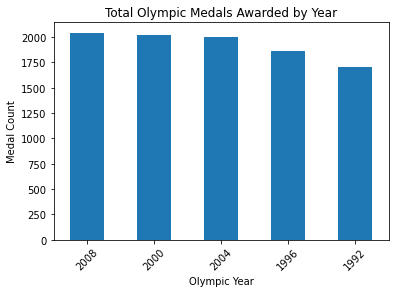

In [133]:
edition_medals["Medal"].plot.bar() #plot medal column

plt.title("Total Olympic Medals Awarded by Year") #change title
plt.xlabel("Olympic Year") #adjust x label
plt.ylabel("Medal Count") #adjust y label
plt.xticks(rotation = 45, horizontalalignment="center") #rotate and center ticks

## Matplotlib Graph 2

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'RUS'),
  Text(2, 0, 'GER'),
  Text(3, 0, 'AUS'),
  Text(4, 0, 'CHN'),
  Text(5, 0, 'ITA'),
  Text(6, 0, 'NED'),
  Text(7, 0, 'KOR'),
  Text(8, 0, 'CUB'),
  Text(9, 0, 'FRA')])

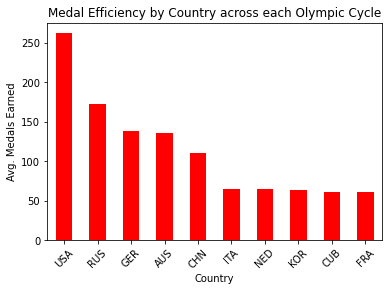

In [131]:
medal_sorted["Medal"].head(10).plot.bar(color = "red") #plot top 10

plt.title("Medal Efficiency by Country across each Olympic Cycle") #change title
plt.xlabel("Country") #adjust x label
plt.ylabel("Avg. Medals Earned") #adjust y label
plt.xticks(rotation = 45, horizontalalignment="center") #rotate and center ticks